## Read the .csv File

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [6]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [7]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [9]:
df.shape   # Tells us we have 1991 rows and 3 columns.

(1991, 3)

In [10]:
df.count()  # Tell us the number of non-NaN values in each column.

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

In [14]:
df.groupby("TAG").sum(numeric_only=sum)  # Challenge: Calculate the total number of post per language.

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [15]:
df.groupby("TAG").count()  # Challenge: How many months of data exist per language?

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

In [16]:
df['DATE'][1]   # Selecting an individual cell.

'2008-08-01 00:00:00'

In [20]:
type(df['DATE'][1])   # Inspecting the data type.

str

In [22]:
print(pd.to_datetime(df['DATE'][1]))
type((pd.to_datetime(df['DATE'][1])))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

## Data Manipulation

In [24]:
pivoted_df = df.pivot(index='DATE', columns='TAG', values='POSTS')    # Pivoting table.
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01 00:00:00,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01 00:00:00,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01 00:00:00,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01 00:00:00,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01 00:00:00,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [25]:
pivoted_df.isna().values.any()

True

## Data Visualisation with Matplotlib

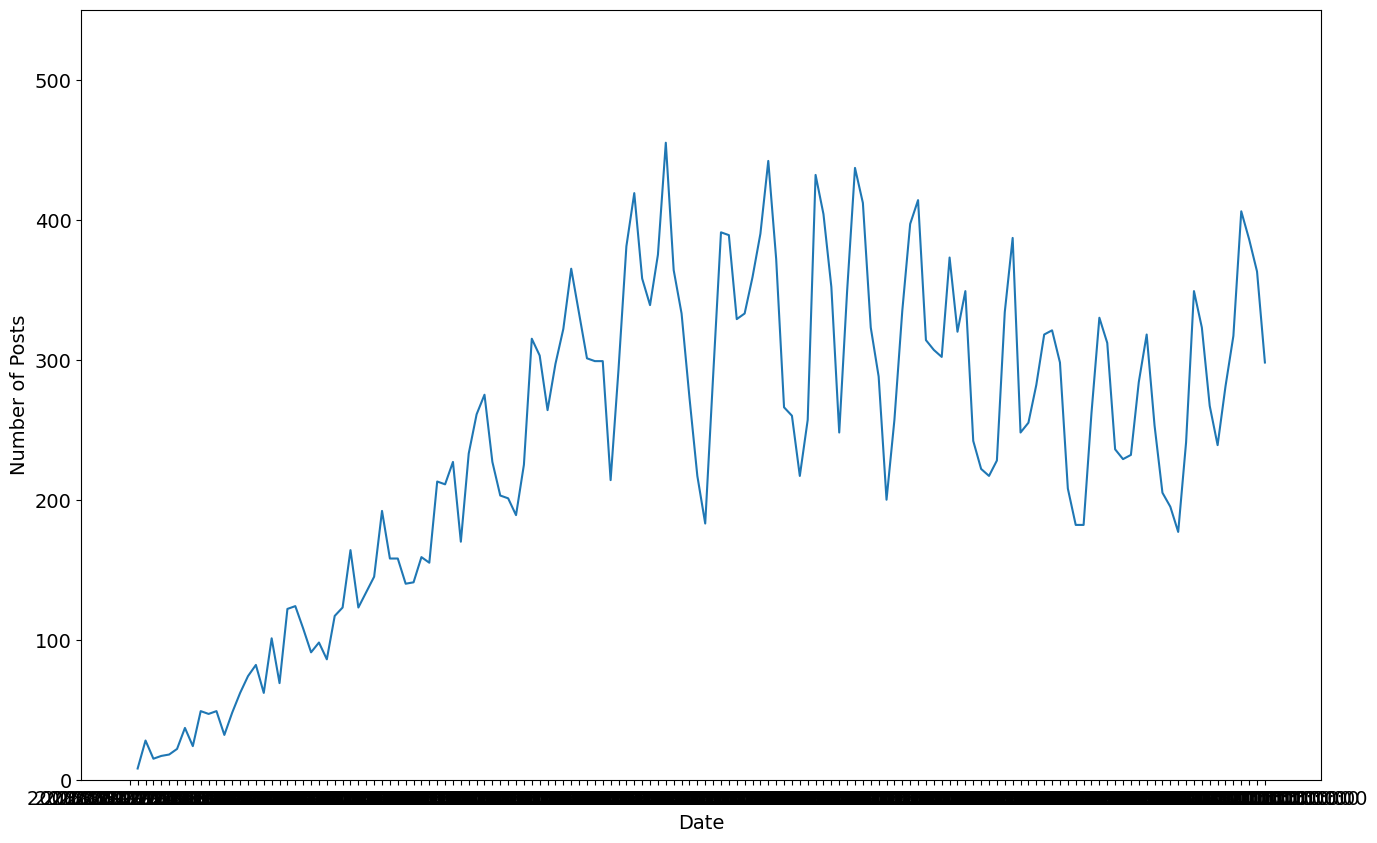

In [37]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 550)
plt.plot(pivoted_df.index, pivoted_df['assembly'])

## Multi-Line Charts with Matplotib

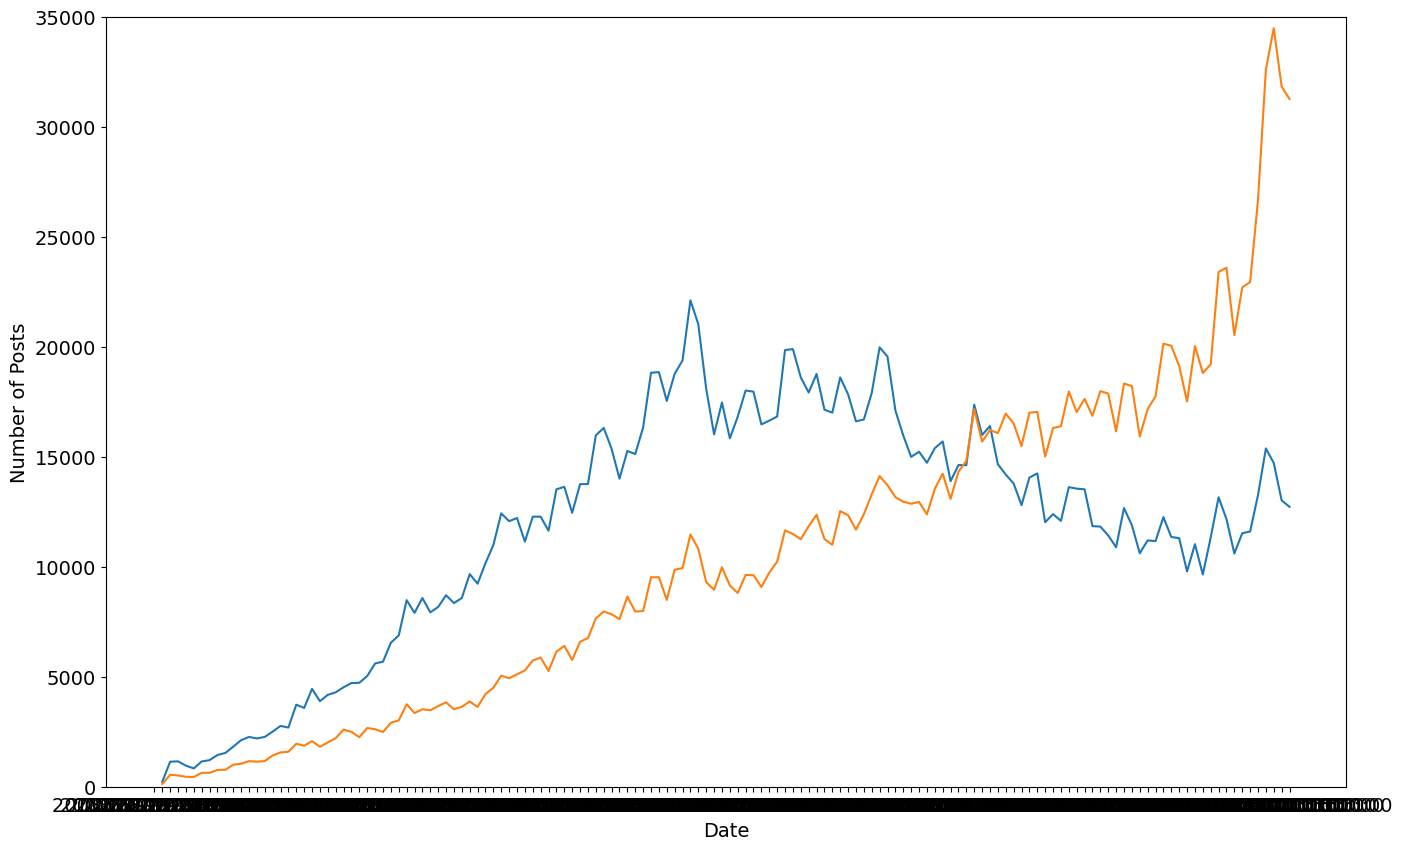

In [45]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
plt.plot(pivoted_df.index, pivoted_df.java)
plt.plot(pivoted_df.index, pivoted_df.python)

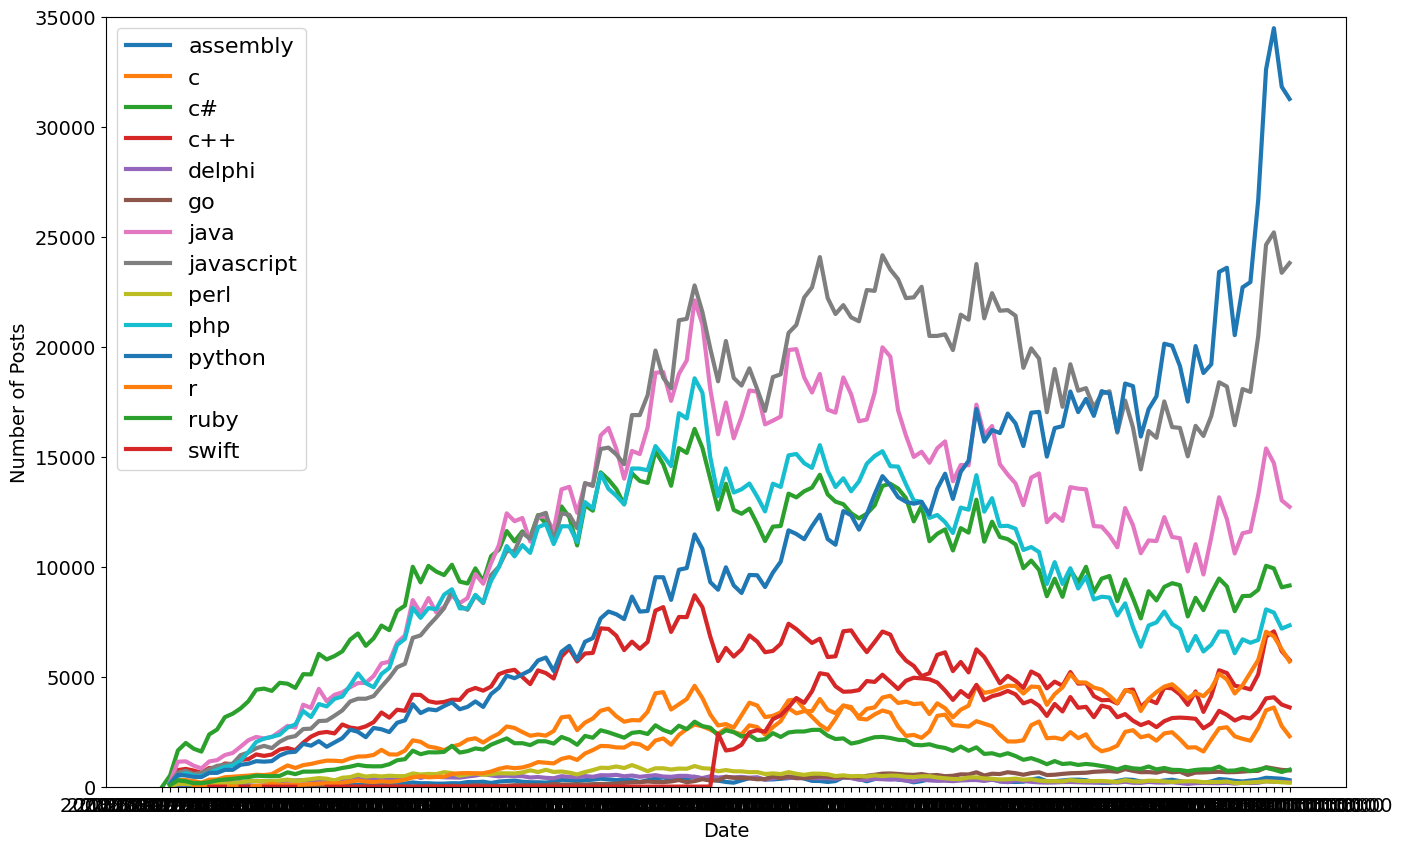

In [47]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for col in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[col], linewidth=3, label=pivoted_df[col].name)
 
plt.legend(fontsize=16) 

## Smoothing out Time-Series Data

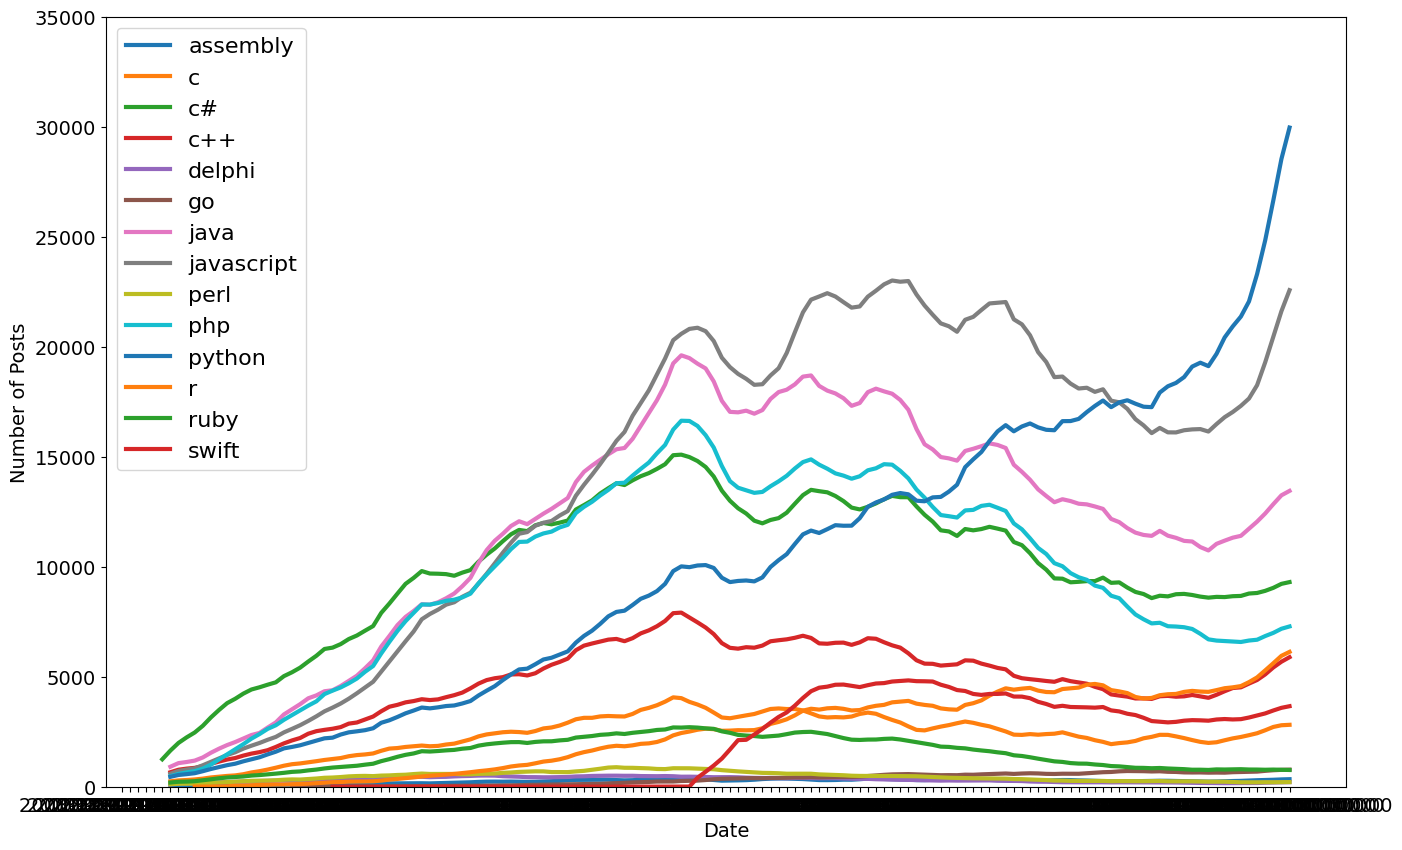

In [48]:
# The window is number of observations that are averaged
roll_df = pivoted_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for col in roll_df.columns:
    plt.plot(roll_df.index, roll_df[col], 
             linewidth=3, label=roll_df[col].name)
 
plt.legend(fontsize=16)